##  UNAD

### Armando Ramires CArdozo 

### Analisis De Datos 
### Dataset Regresión Lineal

### Vehicle dataset


## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


In [1]:
#Cargar las librerias necesrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Car details v3.csv')

In [3]:
# Mostrar las primeras filas del dataframe
print(Datos.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [4]:
# Obtener información sobre el conjunto de datos
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [5]:
# Resumen estadístico de las variables numéricas
print(Datos.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


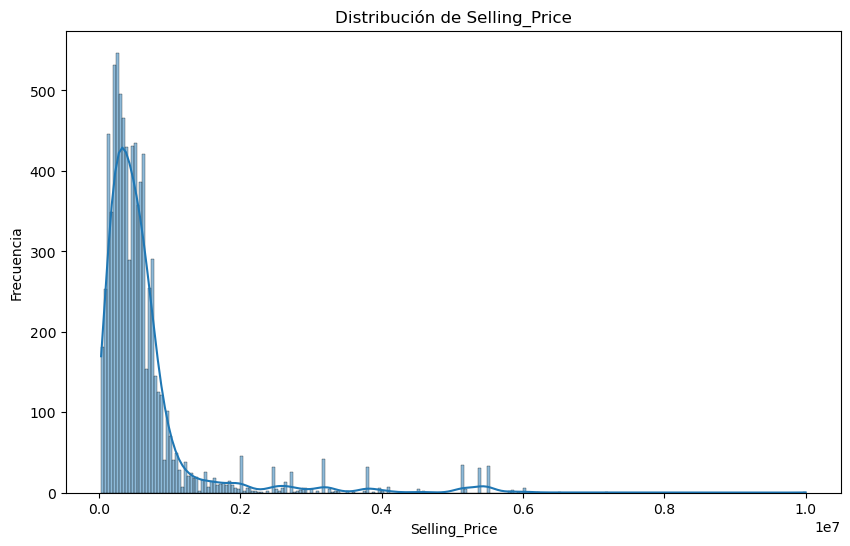

In [6]:
# Visualizar la distribución de la variable objetivo (Price)
plt.figure(figsize=(10, 6))
sns.histplot(Datos['selling_price'], kde=True)
plt.title('Distribución de Selling_Price')
plt.xlabel('Selling_Price')
plt.ylabel('Frecuencia')
plt.show()

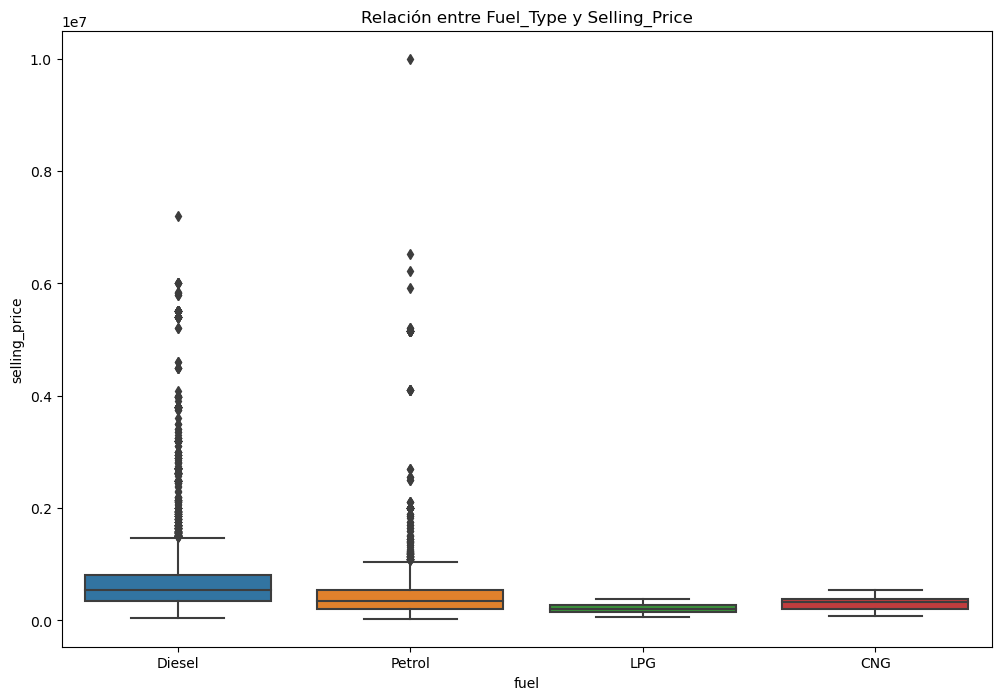

In [7]:
# Explorar relaciones entre variables categóricas y la variable objetivo
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='selling_price', data=Datos)
plt.title('Relación entre Fuel_Type y Selling_Price')
plt.show()

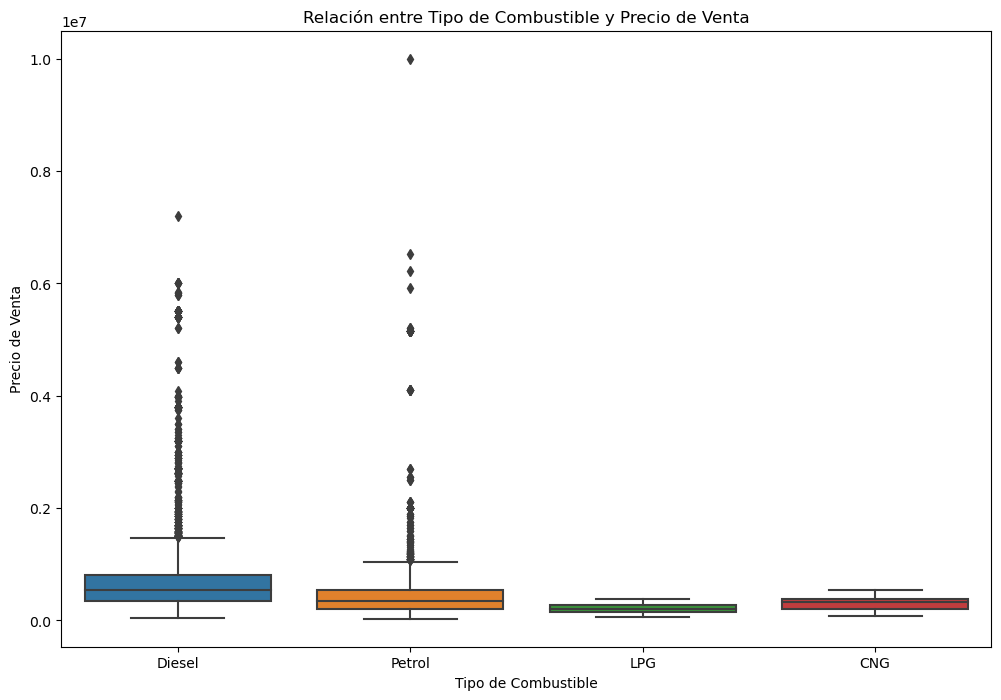

In [8]:
# Boxplot de Fuel_Type vs Selling_Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='selling_price', data=Datos)
plt.title('Relación entre Tipo de Combustible y Precio de Venta')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio de Venta')
plt.show()

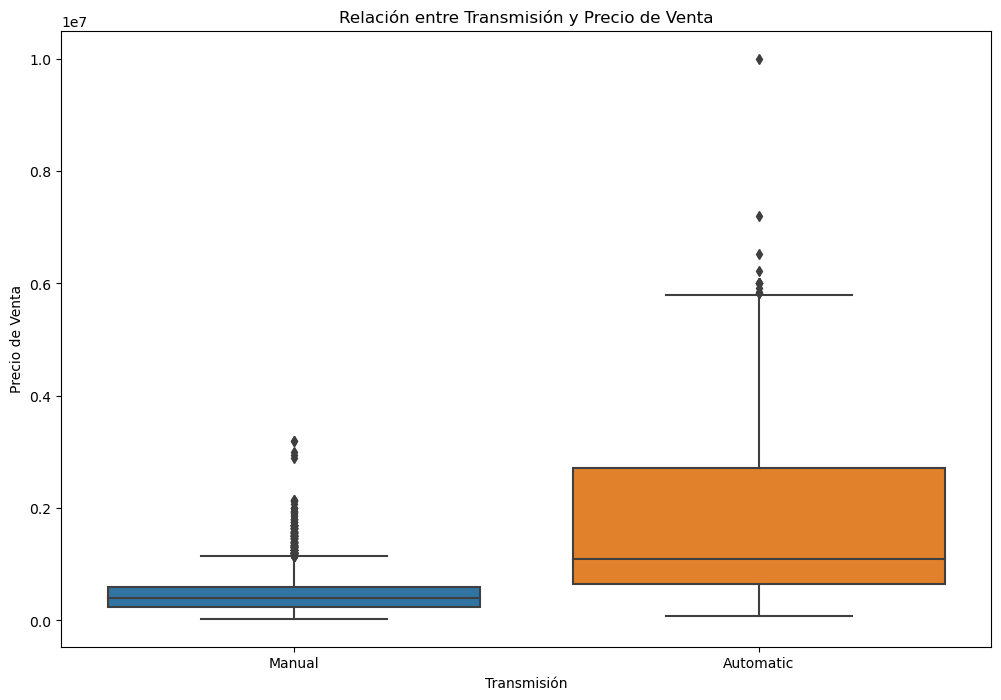

In [9]:
# Boxplot de Transmission vs Selling_Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='transmission', y='selling_price', data=Datos)
plt.title('Relación entre Transmisión y Precio de Venta')
plt.xlabel('Transmisión')
plt.ylabel('Precio de Venta')
plt.show()

In [10]:
# Verificar valores faltantes
valores_faltantes = Datos.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)


Valores faltantes por columna:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [11]:
# Identificar las columnas no numéricas
columnas_no_numericas = Datos.select_dtypes(exclude=['int', 'float']).columns
print("Columnas no numéricas:")
print(columnas_no_numericas)


Columnas no numéricas:
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')


In [12]:
# Identificar las columnas numéricas
columnas_numericas = Datos.select_dtypes(include=['int', 'float']).columns
print("Columnas numéricas:")
print(columnas_numericas)

Columnas numéricas:
Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object')


In [13]:
# Eliminar las columnas no numéricas del DataFrame
Datos_sin_no_numericas = Datos.drop(columnas_no_numericas, axis=1)

# Mostrar el DataFrame resultante
print(Datos_sin_no_numericas.head())

   year  selling_price  km_driven  seats
0  2014         450000     145500    5.0
1  2014         370000     120000    5.0
2  2006         158000     140000    5.0
3  2010         225000     127000    5.0
4  2007         130000     120000    5.0


In [14]:

# Seleccionar características relevantes
caracteristicas_relevantes = ['year', 'km_driven', 'seats']

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = Datos[caracteristicas_relevantes]
y = Datos['selling_price']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (6502, 3)
Shape of y_train: (6502,)
Shape of X_test: (1626, 3)
Shape of y_test: (1626,)


In [15]:
# Crear un imputador para reemplazar los NaN con la media de cada columna
imputador = SimpleImputer(strategy='mean')

# Imputar los valores faltantes en el conjunto de entrenamiento
X_train_imputado = imputador.fit_transform(X_train)

# Crear una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression(fit_intercept=True)

# Entrenar el modelo con el conjunto de entrenamiento imputado
modelo_regresion.fit(X_train_imputado, y_train)

# Imprimir los coeficientes y el término de intercepto
print("Coeficientes:", modelo_regresion.coef_)
print("Término de intercepto:", modelo_regresion.intercept_)


NameError: name 'SimpleImputer' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(imputador.transform(X_test))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R²):", r2)


In [ ]:
# Diagrama de dispersión de valores reales vs. predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Línea diagonal
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

### Evaluación del modelo:
- Error Cuadrático Medio (MSE): El MSE es una medida de la calidad de las predicciones del modelo. En este caso, el MSE obtenido es aproximadamente 535,911,151,950.3664.
Raíz del Error Cuadrático Medio (RMSE): El RMSE es la raíz cuadrada del MSE y proporciona una interpretación más intuitiva del error. En este caso, el RMSE es aproximadamente 732,059.53.
Coeficiente de Determinación (R²): El coeficiente de determinación R² indica cuánta variación en la variable dependiente (precio de venta) es explicada por las características utilizadas en el modelo. En este caso, el valor de R² es aproximadamente 0.182, lo que significa que alrededor del 18.2% de la variación en el precio de venta se explica por las características utilizadas en el modelo.
- Interpretación de las visualizaciones:
Diagrama de dispersión de valores reales vs. predicciones: En este gráfico, los puntos representan las predicciones del modelo (en el eje y) frente a los valores reales (en el eje x). Idealmente, los puntos deberían estar distribuidos alrededor de la línea diagonal (línea de pendiente 1), lo que indicaría que las predicciones del modelo son cercanas a los valores reales. Sin embargo, en este caso, los puntos parecen estar dispersos y no siguen una tendencia clara, lo que sugiere que el modelo puede no estar capturando adecuadamente la relación entre las características y el precio de venta.
Histograma de los residuos: El histograma muestra la distribución de los residuos, que son las diferencias entre los valores reales y las predicciones del modelo. Idealmente, los residuos deberían seguir una distribución normal alrededor de cero, lo que indicaría que el modelo está haciendo predicciones precisas. Sin embargo, en este caso, el histograma muestra una distribución sesgada hacia la derecha, lo que sugiere que el modelo puede estar sesgado y que las predicciones pueden no ser precisas en todo el rango de precios de venta.
### Conclusiones:
Aunque el modelo de regresión lineal se ajusta a los datos, su rendimiento es limitado. El bajo valor de R² indica que las características utilizadas en el modelo explican solo una pequeña parte de la variación en el precio de venta.
Es posible que el modelo necesite características adicionales o una técnica de modelado más avanzada para mejorar su rendimiento y hacer predicciones más precisas.
Se recomienda explorar otras técnicas de modelado, como modelos de árbol de decisión, bosques aleatorios o modelos de aprendizaje profundo, para mejorar la precisión de las predicciones del precio de venta de los automóviles. Además, se podría considerar la inclusión de más características relevantes o la optimización de los hiperparámetros del modelo para obtener mejores resultados.

9. cuenta en GitHub 

https://github.com/armado719/Tarea-3-Algoritmos-de-Aprendizaje-Supervisado.git

